In [31]:
import cv2
import os
import matplotlib.pyplot as plt

In [32]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append(img)
    return images

In [70]:
def showim(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [183]:
imgs = load_images_from_folder("receipt")

In [184]:
len(imgs)

203

In [185]:
img = imgs[-1]

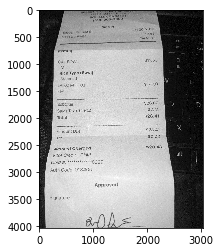

In [186]:
showim(img)

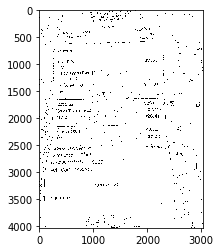

In [187]:
thImg = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,15)
showim(thImg)

In [188]:
for i in range(len(imgs)):
    cv2.imwrite('receipt\processed\{}.jpg'.format(i),cv2.adaptiveThreshold(imgs[i],255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,15))

In [23]:
# import pytesseract as pyt

In [189]:
# # print(pyt.image_to_string(thImg))
# def detect_text(path):
#     client = vision.ImageAnnotatorClient()

#     with io.open(path, 'rb') as image_file:
#         content = image_file.read()

#     image = vision.types.Image(content=content)

#     response = client.text_detection(image=image)
#     texts = response.text_annotations
#     print('Texts:')

#     for text in texts:
#         print('\n"{}"'.format(text.description))

#         vertices = (['({},{})'.format(vertex.x, vertex.y)
#                     for vertex in text.bounding_poly.vertices])

#         print('bounds: {}'.format(','.join(vertices)))

In [78]:
from google.cloud import vision
import io
from google.cloud import vision 
from matplotlib import pyplot as plt 
from matplotlib import patches as pch 

In [79]:
import argparse
from enum import Enum
import io

from google.cloud.vision import types
from PIL import Image, ImageDraw

In [80]:
import json
from google.protobuf.json_format import MessageToDict

In [171]:
import re

In [190]:
img_path = 'receipt\processed'
img_name = '202.jpg'

In [191]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.path.join(os.curdir, 'CalhackCV-a4f9f43dfda3.json')
client = vision.ImageAnnotatorClient()

bounds = []
read_path = os.path.join(img_path,img_name)
write_path = os.path.join(img_path,'resizeTemp.jpg')

img = cv2.imread(os.path.join(img_path,img_name))
width = 500
height = 1000
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

cv2.imwrite(write_path, resized)
# showim(resized)

with io.open(read_path, 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

response_Org = client.document_text_detection(image=image)
document = response_Org.text_annotations

In [192]:
response = MessageToDict(response_Org)

In [193]:
texts = response['textAnnotations'][0]['description']
texts = re.split('\n| ',texts)

In [194]:
# contain = {'total','due','duf'}
# notContain = {'sub','sal','tax','net','crv'}
# text = ''
# for i in range(1,len(texts)-1):
#     text = texts[i]
#     text = text.lower()
#     if any(each in text for each in contain):
#         if not any(each in text for each in notContain):
#             break

In [195]:
# # a = filter(lambda x: x in '0123456789.', texts[i+1])
# num = ''
# for tries in range(i,len(texts)):
#     temp = ''
#     if '.' in texts[tries]:
#         temp = temp.join(c for c in texts[tries] if c in '0123456789.')
#         if len(temp)>3:
#             num = float(temp)
#             break
# num

In [196]:
num = []
for eachI in range(len(texts)):
    temp = ''
    if '.' in texts[eachI]:
        temp = temp.join(c for c in texts[eachI] if c in '0123456789.')
        if len(texts[eachI].split('.')[1])==2:
            num.append(float(temp))
        

In [197]:
max(num)

28.41